In [1]:
# Import thư viện
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [6]:
# Chuẩn bị dữ liệu
data = pd.read_excel('../../Data/Iris.xls')
print(data.info(), '\n')
print("======================================================================")
print(data.head())

print("======================================================================")

x = data.drop('iris', axis=1)
print(x.head())

print("======================================================================")

y = data['iris']
print(y.head())

print("==================================================================")

print("Các nhãn (classes):", y.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0

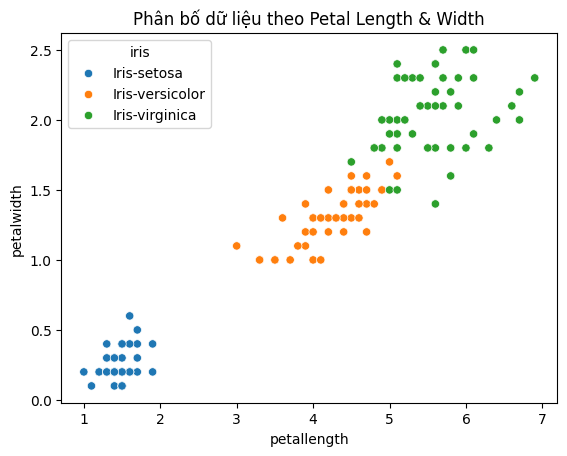

In [7]:
# Biểu diễn trực quan
sbn.scatterplot(x='petallength', y='petalwidth', data=data, hue='iris')
plt.title("Phân bố dữ liệu theo Petal Length & Width")
plt.show()

In [9]:
# Chia dữ liệu train/test 80/20
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

print(f"Training size: {x_train.shape[0]}, Test size: {x_test.shape[0]}")

Training size: 120, Test size: 30


In [ ]:
# Chọn K
k = int(pow(x_train.shape[0], 1/2) / 2)
print(f"Số lượng lân cận (k) được chọn = {k}")

Số lượng lân cận (k) được chọn = 5


In [ ]:
# Xây dựng mô hình KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
# Lưu mô hình
output_path = '../Output/kNN_Iris.pkl'
jlb.dump(knn, output_path)
print(f"✅ Đã lưu mô hình tại: {output_path}")

✅ Đã lưu mô hình tại: ../Output/kNN_Iris.pkl


In [14]:
# Dự đoán và kiểm thử
model = jlb.load(output_path)
y_pred = model.predict(x_test)

In [15]:
# So sánh kết quả
df_compare = pd.DataFrame({'Thực tế': y_test.values, 'Dự đoán': y_pred})
print(df_compare.head(10))

print(f"\nSố trường hợp dự đoán ĐÚNG: {(y_pred == y_test).sum()}/{len(y_test)}")

           Thực tế          Dự đoán
0   Iris-virginica   Iris-virginica
1      Iris-setosa      Iris-setosa
2  Iris-versicolor  Iris-versicolor
3      Iris-setosa      Iris-setosa
4      Iris-setosa      Iris-setosa
5      Iris-setosa      Iris-setosa
6   Iris-virginica   Iris-virginica
7   Iris-virginica   Iris-virginica
8   Iris-virginica   Iris-virginica
9  Iris-versicolor  Iris-versicolor

Số trường hợp dự đoán ĐÚNG: 29/30


In [16]:
# Đánh giá mô hinh
def classification_eval(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (macro)': precision_score(y_true, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_true, y_pred, average='macro'),
        'F1-score (macro)': f1_score(y_true, y_pred, average='macro')
    }

scores = classification_eval(y_test, y_pred)

print("\n=== 🔍 ĐÁNH GIÁ MÔ HÌNH ===")
for metric, value in scores.items():
    print(f"{metric:20s}: {value*100:.2f}%")

print("\n=== 📊 BÁO CÁO CHI TIẾT ===")
print(classification_report(y_test, y_pred))


=== 🔍 ĐÁNH GIÁ MÔ HÌNH ===
Accuracy            : 96.67%
Precision (macro)   : 96.97%
Recall (macro)      : 96.67%
F1-score (macro)    : 96.66%

=== 📊 BÁO CÁO CHI TIẾT ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [17]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\n=== 🔢 Ma trận nhầm lẫn ===")
print(cm)


=== 🔢 Ma trận nhầm lẫn ===
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


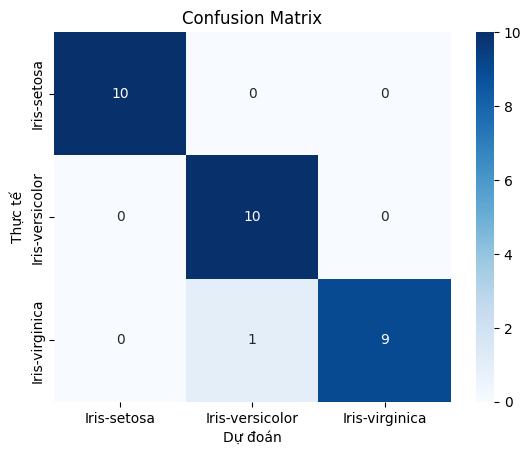

In [19]:
# Hiển thị trực quan ma trận
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [20]:
# Dự đoán
while True:
    try:
        idx = int(input(f"Nhập chỉ số dòng (0 → {len(x_test)-1}) hoặc -1 để thoát: "))
        if idx == -1:
            break
        if 0 <= idx < len(x_test):
            x_new = x_test.iloc[[idx]]
            y_hat = model.predict(x_new)[0]
            print(f"Mẫu {idx}: \n{x_new.to_string(index=False)}")
            print(f"👉 Dự đoán: {y_hat}\n")
        else:
            print("❌ Chỉ số không hợp lệ.")
    except ValueError:
        print("❌ Vui lòng nhập số nguyên hợp lệ.")

Mẫu 3: 
 sepallength  sepalwidth  petallength  petalwidth
         4.8         3.4          1.6         0.2
👉 Dự đoán: Iris-setosa

Mẫu 4: 
 sepallength  sepalwidth  petallength  petalwidth
         5.0         3.5          1.6         0.6
👉 Dự đoán: Iris-setosa

